Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Main_Dataset.csv')
df.head(10)

,CustomerID,Age,Gender,GenderLabel,MaritalStatus,MaritalStatusLabel,IncomeLevel,IncomeLevelLabel,LoginFrequency,ServiceUsage,...,InquiryInteraction,InquiryStatusResolved,InquiryStatusUnResolved,FeedBackInteraction,FeedBackStatusResolved,FeedBackStatusUnresolved,ComplaintInteraction,ComplaintStatusResolved,ComplaintStatusUnresolved,ChurnStatus
0,1,62,M,1,Single,1,Low,1,34,Mobile App,...,1,1,0,0,0,0,0,0,0,0
1,2,65,M,1,Married,2,Low,1,5,Website,...,1,1,0,0,0,0,0,0,0,1
2,3,18,M,1,Single,1,Low,1,3,Website,...,1,1,0,0,0,0,0,0,0,0
3,4,21,M,1,Widowed,3,Low,1,2,Website,...,2,1,1,0,0,0,0,0,0,0
4,5,21,M,1,Divorced,4,Medium,2,41,Website,...,0,0,0,0,0,0,0,0,0,0
5,6,57,F,0,Divorced,4,Medium,2,2,Website,...,0,0,0,1,1,0,0,0,0,0
6,7,27,F,0,Married,2,High,3,32,Mobile App,...,0,0,0,0,0,0,0,0,0,0
7,8,37,M,1,Single,1,Low,1,17,Online Banking,...,1,0,1,1,0,1,0,0,0,1
8,9,39,M,1,Divorced,4,High,3,24,Website,...,1,1,0,0,0,0,0,0,0,0
9,10,68,M,1,Married,2,High,3,29,Online Banking,...,0,0,0,0,0,0,0,0,0,1


In [3]:
#Dataset overview

print(df.shape)
print('\n Churn Distribution')
print(df['ChurnStatus'].value_counts())
print(f"\n Churn rate: {df['ChurnStatus'].mean():.2%} ")

#Basic statistics
print(df.describe())



(1000, 22)

 Churn Distribution
ChurnStatus
0    796
1    204
Name: count, dtype: int64

 Churn rate: 20.40% 
        CustomerID          Age  GenderLabel  MaritalStatusLabel  \
count  1000.000000  1000.000000  1000.000000         1000.000000   
mean    500.500000    43.267000     0.487000            2.557000   
std     288.819436    15.242311     0.500081            1.083478   
min       1.000000    18.000000     0.000000            1.000000   
25%     250.750000    30.000000     0.000000            2.000000   
50%     500.500000    43.000000     0.000000            3.000000   
75%     750.250000    56.000000     1.000000            3.000000   
max    1000.000000    69.000000     1.000000            4.000000   

       IncomeLevelLabel  LoginFrequency  ServiceUsageLabel  \
count       1000.000000     1000.000000        1000.000000   
mean           2.024000       25.912000           2.007000   
std            0.821035       14.055953           0.831651   
min            1.000000      

In [4]:
Gender_distribution = df['Gender'].value_counts()
print(f"{Gender_distribution *100/1000} ")

Gender
F    51.3
M    48.7
Name: count, dtype: float64 


Churn Distribution

C:\Users\musha\AppData\Local\Temp\ipykernel_125480\2517438697.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ChurnStatus', y='Age', ax=axes[1,2], palette=['lightblue', 'lightcoral'])
C:\Users\musha\AppData\Local\Temp\ipykernel_125480\2517438697.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,2].set_xticklabels(['Retained', 'Churned'])


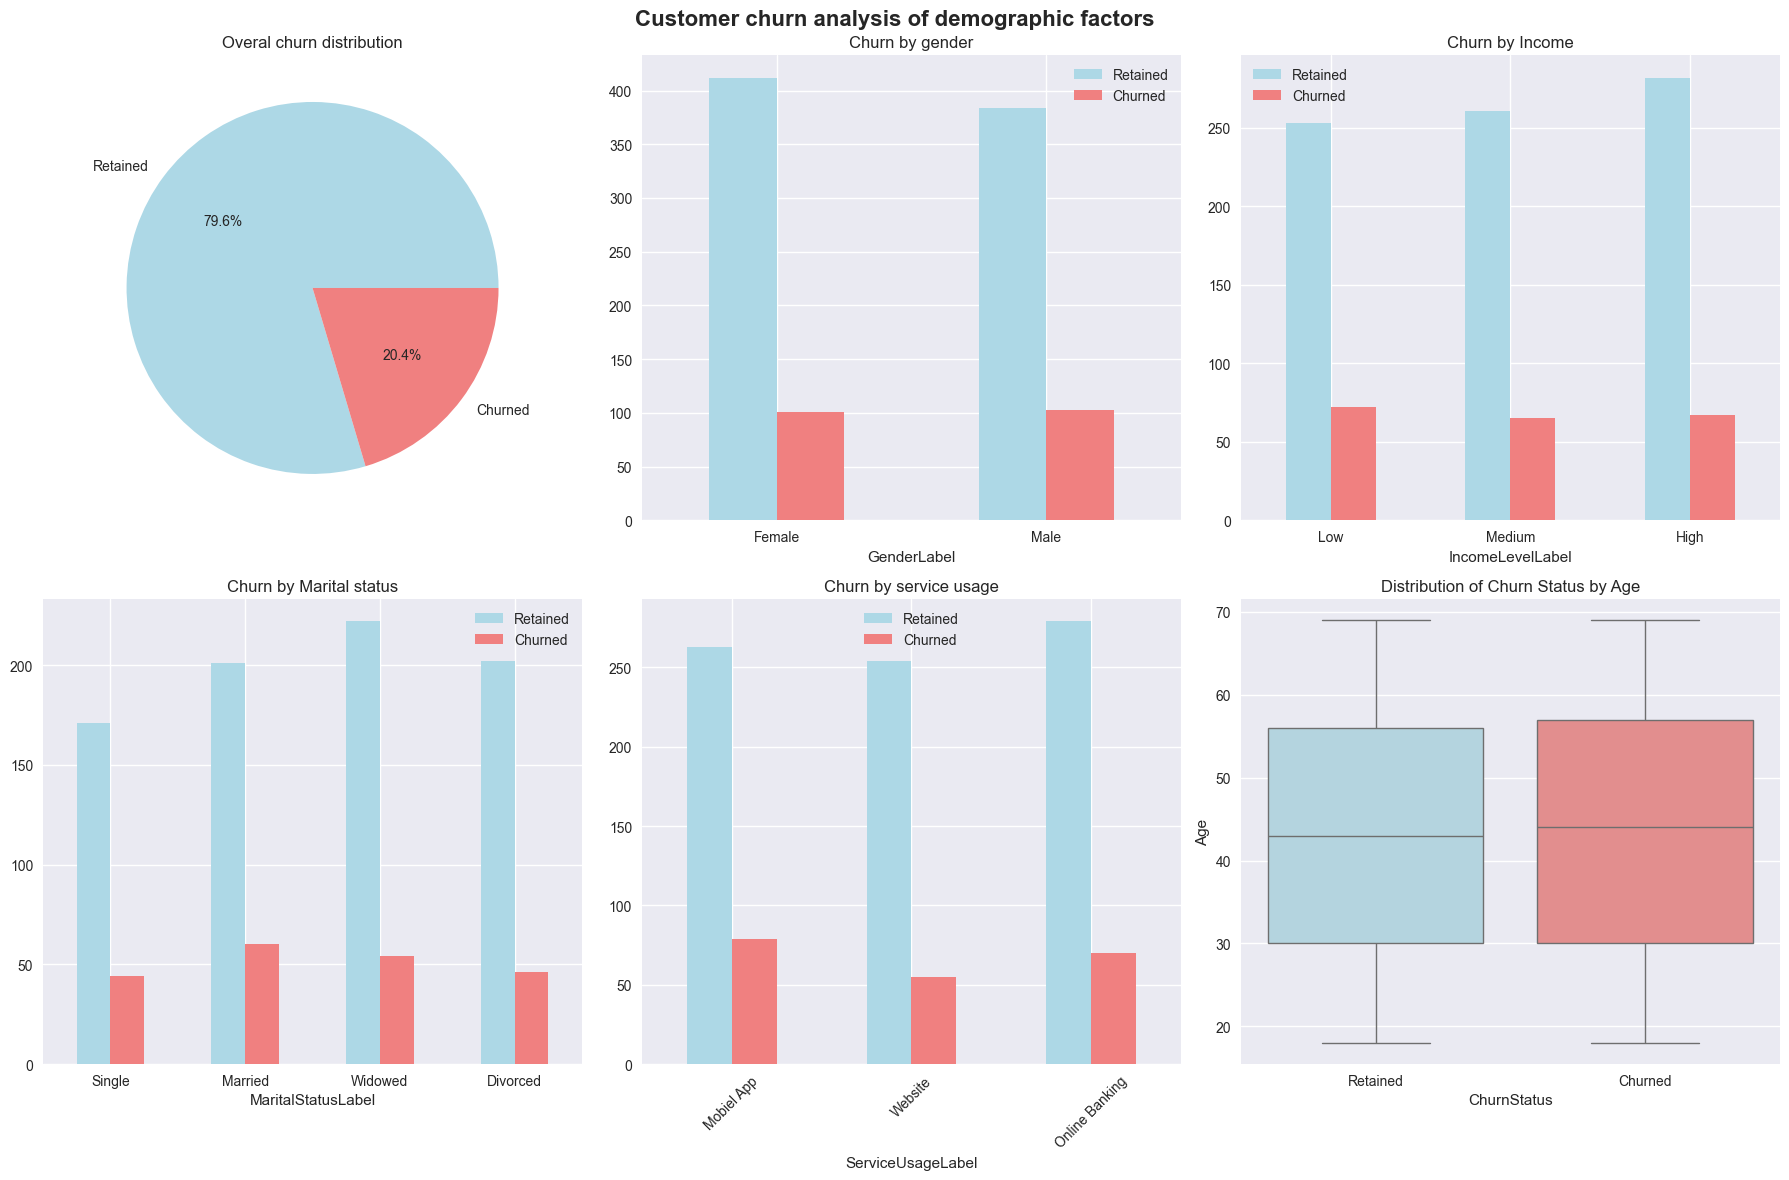

In [5]:
#Visuals
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize= (18, 12))
fig.suptitle('Customer churn analysis of demographic factors', fontsize=16, fontweight='bold')

#Churn distribution
churn_counts = df['ChurnStatus'].value_counts()
axes[0,0].pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[0,0].set_title('Overal churn distribution')

#Churn by gender
gender_churn = pd.crosstab(df['GenderLabel'], df['ChurnStatus'])
gender_churn.plot(kind='bar', ax=axes[0,1], color=['lightblue', 'lightcoral'])
axes[0,1].set_title('Churn by gender')
axes[0,1].set_xticklabels(['Female', 'Male'], rotation=0)
axes[0,1].legend(['Retained', 'Churned'])

#churn by Income Level
income_churn = pd.crosstab(df['IncomeLevelLabel'], df['ChurnStatus'])
income_churn.plot(kind='bar', ax=axes[0,2], color=['lightblue','lightCoral'])
axes[0,2].set_title('Churn by Income')
axes[0,2].set_xticklabels(['Low', 'Medium', 'High'], rotation=0)
axes[0,2].legend(['Retained', 'Churned'])


#Church by Marital Status
maritalStatus_churn = pd.crosstab(df['MaritalStatusLabel'],df['ChurnStatus'])
maritalStatus_churn.plot(kind='bar', ax=axes[1,0],color=['lightblue', 'lightcoral'])
axes[1,0].set_title('Churn by Marital status')
axes[1,0].set_xticklabels(['Single', 'Married','Widowed','Divorced'], rotation=0)
axes[1,0].legend(['Retained', 'Churned'])

#Churn by service Usage
service_churn = pd.crosstab(df['ServiceUsageLabel'], df['ChurnStatus'])
service_churn.plot(kind='bar', ax=axes[1,1], color= ['lightblue', 'lightcoral'])
axes[1,1].set_title('Churn by service usage')
axes[1,1].set_xticklabels(['Mobiel App', 'Website', 'Online Banking'], rotation=45)
axes[1,1].legend(['Retained', 'Churned'])

#Churn by age
sns.boxplot(data=df, x='ChurnStatus', y='Age', ax=axes[1,2], palette=['lightblue', 'lightcoral'])
axes[1,2].set_title('Distribution of Churn Status by Age')
axes[1,2].set_xticklabels(['Retained', 'Churned'])

plt.tight_layout()
plt.show()

Customer behavior exploration

C:\Users\musha\AppData\Local\Temp\ipykernel_125480\2099812868.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ChurnStatus', y='LoginFrequency', ax=axes[0], palette=['lightblue', 'lightcoral'])
C:\Users\musha\AppData\Local\Temp\ipykernel_125480\2099812868.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Retained', 'Churned'])
C:\Users\musha\AppData\Local\Temp\ipykernel_125480\2099812868.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ChurnStatus', y='CustomerTotalAmountSpent', ax=axes[1], palette=['lightblue', 'lightcoral'])
C:\Users\musha\AppData

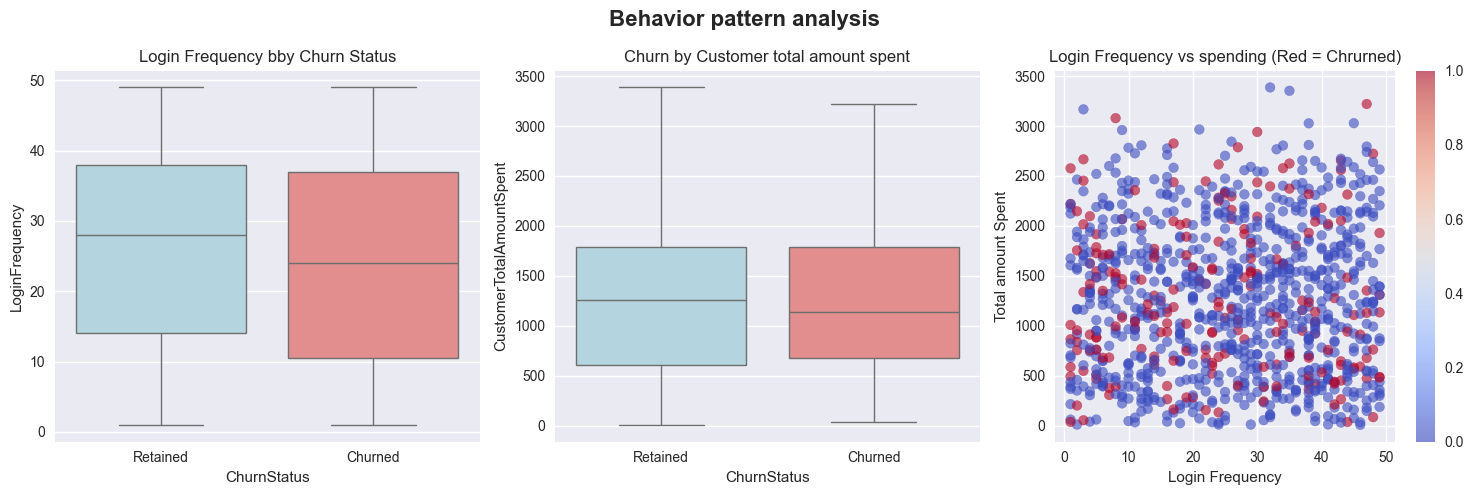

In [6]:
fig, axes =plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Behavior pattern analysis', fontsize=16, fontweight='bold')

#Login frequency vs Churn
sns.boxplot(data=df, x='ChurnStatus', y='LoginFrequency', ax=axes[0], palette=['lightblue', 'lightcoral'])
axes[0].set_title('Login Frequency bby Churn Status')
axes[0].set_xticklabels(['Retained', 'Churned'])

#Total amout spent vs churn

sns.boxplot(data=df, x='ChurnStatus', y='CustomerTotalAmountSpent', ax=axes[1], palette=['lightblue', 'lightcoral'])
axes[1].set_title('Churn by Customer total amount spent')
axes[1].set_xticklabels(['Retained', 'Churned'])

#Login Frequency vs Spending
scatter = axes[2].scatter(df['LoginFrequency'], df['CustomerTotalAmountSpent'], c=df['ChurnStatus'], cmap ='coolwarm', alpha=0.6)
axes[2].set_xlabel('Login Frequency')
axes[2].set_ylabel('Total amount Spent')
axes[2].set_title('Login Frequency vs spending (Red = Chrurned)')
plt.colorbar(scatter, ax=axes[2])


plt.tight_layout()
plt.show()

Correlation Analysis

Top Features Correlated with Churn


NameError: name 'churn_corr' is not defined

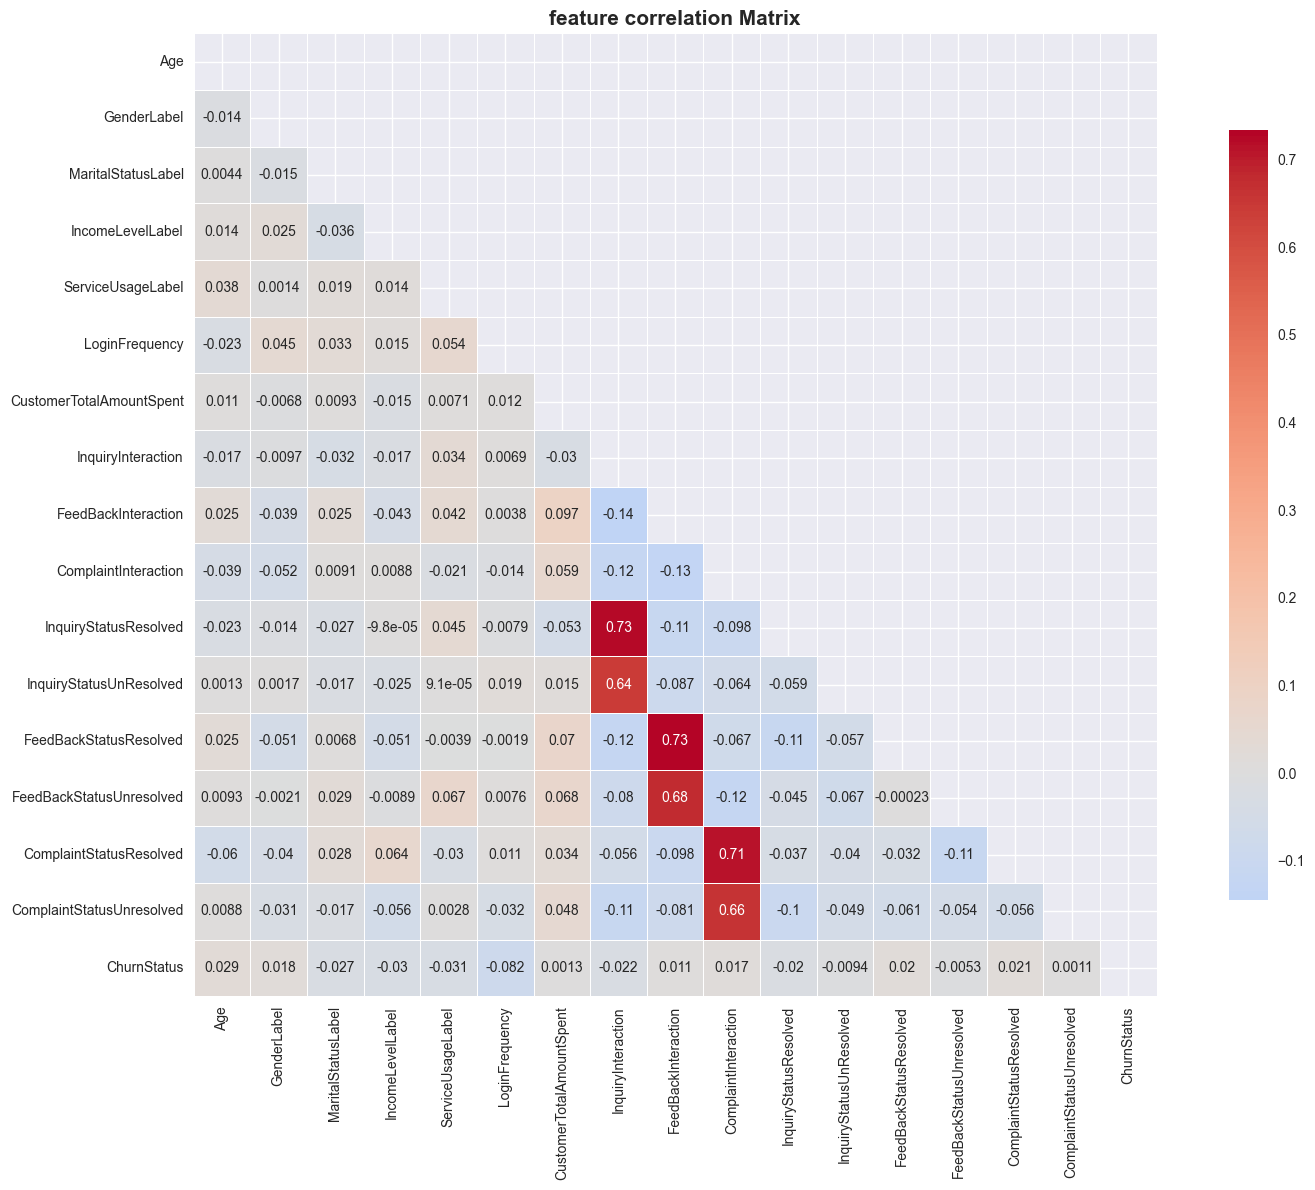

In [7]:
# Correlation matrix
plt.figure(figsize=(16, 12))

#Select feature for correlation analysis
corr_feature = ['Age','GenderLabel', 'MaritalStatusLabel','IncomeLevelLabel','ServiceUsageLabel','LoginFrequency', 'CustomerTotalAmountSpent', 
                'InquiryInteraction', 'FeedBackInteraction', 'ComplaintInteraction',
                'InquiryStatusResolved', 'InquiryStatusUnResolved',
                'FeedBackStatusResolved', 'FeedBackStatusUnresolved',
                'ComplaintStatusResolved', 'ComplaintStatusUnresolved', 'ChurnStatus']

correlation_matrix = df[corr_feature].corr()

#Creation of a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#Plot correalatioin heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('feature correlation Matrix', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show

#show Top coreelations with churn status
Churn_corr = correlation_matrix['ChurnStatus'].sort_values(ascending=False)
print("Top Features Correlated with Churn")
print(churn_corr)

Data scalling

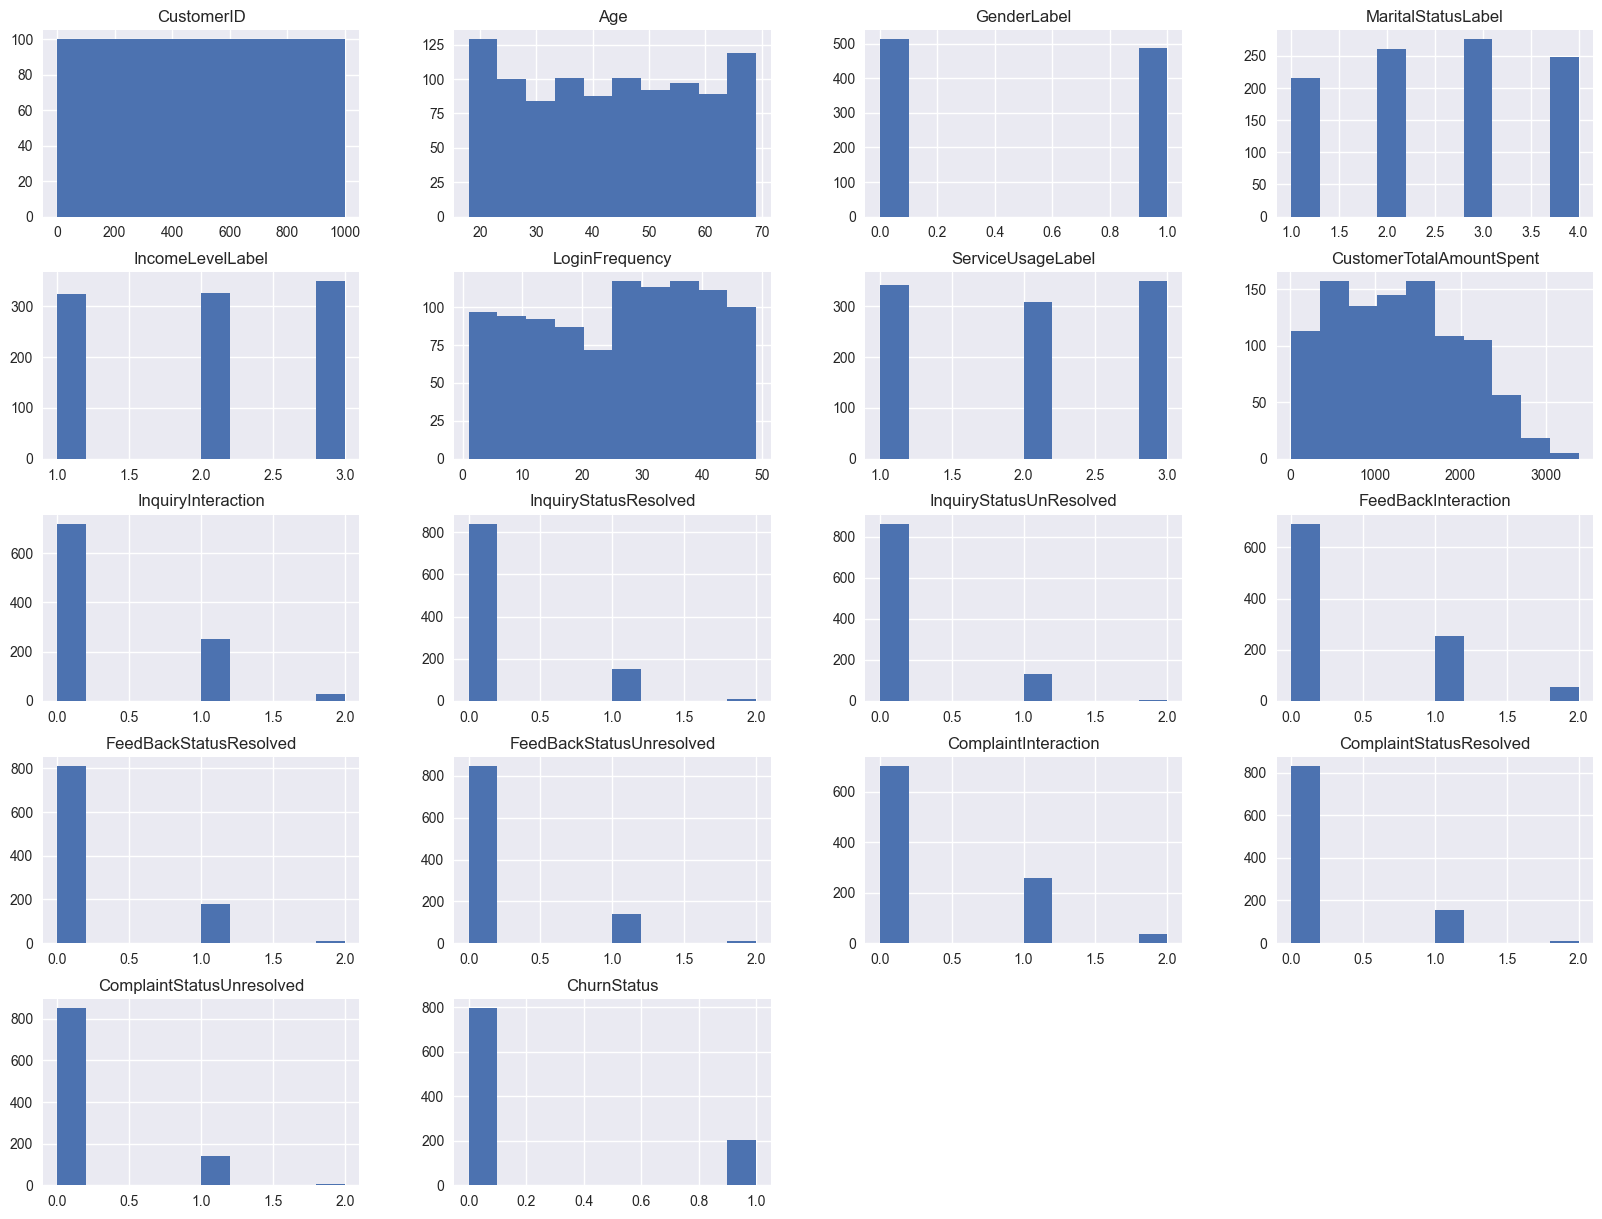

In [8]:
df.hist(figsize=(20, 15))
plt.show()


In [9]:
df.describe()

,CustomerID,Age,GenderLabel,MaritalStatusLabel,IncomeLevelLabel,LoginFrequency,ServiceUsageLabel,CustomerTotalAmountSpent,InquiryInteraction,InquiryStatusResolved,InquiryStatusUnResolved,FeedBackInteraction,FeedBackStatusResolved,FeedBackStatusUnresolved,ComplaintInteraction,ComplaintStatusResolved,ComplaintStatusUnresolved,ChurnStatus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,0.487000,2.557000,2.024000,25.912000,2.007000,1267.074950,0.307000,0.168000,0.139000,0.36000,0.199000,0.161000,0.335000,0.179000,0.156000,0.204000
std,288.819436,15.242311,0.500081,1.083478,0.821035,14.055953,0.831651,738.590013,0.518671,0.397409,0.357501,0.58029,0.426123,0.393998,0.546877,0.411252,0.384463,0.403171
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,9.800000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,30.000000,0.000000,2.000000,1.000000,13.750000,1.000000,626.685000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500.500000,43.000000,0.000000,3.000000,2.000000,27.000000,2.000000,1232.880000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,750.250000,56.000000,1.000000,3.000000,3.000000,38.000000,3.000000,1791.902500,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1000.000000,69.000000,1.000000,4.000000,3.000000,49.000000,3.000000,3386.040000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [10]:
df.head(1)

,CustomerID,Age,Gender,GenderLabel,MaritalStatus,MaritalStatusLabel,IncomeLevel,IncomeLevelLabel,LoginFrequency,ServiceUsage,...,InquiryInteraction,InquiryStatusResolved,InquiryStatusUnResolved,FeedBackInteraction,FeedBackStatusResolved,FeedBackStatusUnresolved,ComplaintInteraction,ComplaintStatusResolved,ComplaintStatusUnresolved,ChurnStatus
0,1,62,M,1,Single,1,Low,1,34,Mobile App,...,1,1,0,0,0,0,0,0,0,0


In [11]:
df2 = df.drop(columns = ['CustomerID', 'Gender', 'MaritalStatus', 'IncomeLevel', 'ServiceUsage'])
df2.head(1)

,Age,GenderLabel,MaritalStatusLabel,IncomeLevelLabel,LoginFrequency,ServiceUsageLabel,CustomerTotalAmountSpent,InquiryInteraction,InquiryStatusResolved,InquiryStatusUnResolved,FeedBackInteraction,FeedBackStatusResolved,FeedBackStatusUnresolved,ComplaintInteraction,ComplaintStatusResolved,ComplaintStatusUnresolved,ChurnStatus
0,62,1,1,1,34,1,416.5,1,1,0,0,0,0,0,0,0,0


In [12]:


from sklearn.preprocessing import StandardScaler

Standardized_cols = ['CustomerTotalAmountSpent',
    'Age',
    'LoginFrequency',
    'InquiryInteraction',
    'FeedBackInteraction',
    'ComplaintInteraction',
    'InquiryStatusResolved', 
    'InquiryStatusUnResolved',
    'FeedBackStatusResolved',
    'FeedBackStatusUnresolved',
    'ComplaintStatusResolved',
    'ComplaintStatusUnresolved']

scaleStandard = StandardScaler()

df2[Standardized_cols] = scaleStandard.fit_transform(df[Standardized_cols])


In [34]:
df2[Standardized_cols].head()

,CustomerTotalAmountSpent,Age,LoginFrequency,InquiryInteraction,FeedBackInteraction,ComplaintInteraction,InquiryStatusResolved,InquiryStatusUnResolved,FeedBackStatusResolved,FeedBackStatusUnresolved,ComplaintStatusResolved,ComplaintStatusUnresolved
0,-1.152196,1.229628,0.575702,1.336775,-0.62069,-0.612876,2.094608,-0.389005,-0.467235,-0.408836,-0.435474,-0.405964
1,0.379758,1.426547,-1.488513,1.336775,-0.62069,-0.612876,2.094608,-0.389005,-0.467235,-0.408836,-0.435474,-0.405964
2,0.590481,-1.658518,-1.630872,1.336775,-0.62069,-0.612876,2.094608,-0.389005,-0.467235,-0.408836,-0.435474,-0.405964
3,-0.473822,-1.461599,-1.702052,3.265742,-0.62069,-0.612876,2.094608,2.409591,-0.467235,-0.408836,-0.435474,-0.405964
4,0.994845,-1.461599,1.073961,-0.592193,-0.62069,-0.612876,-0.422950,-0.389005,-0.467235,-0.408836,-0.435474,-0.405964


In [37]:
df2[Standardized_cols].describe().round(3)

,CustomerTotalAmountSpent,Age,LoginFrequency,InquiryInteraction,FeedBackInteraction,ComplaintInteraction,InquiryStatusResolved,InquiryStatusUnResolved,FeedBackStatusResolved,FeedBackStatusUnresolved,ComplaintStatusResolved,ComplaintStatusUnresolved
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.703,-1.659,-1.773,-0.592,-0.621,-0.613,-0.423,-0.389,-0.467,-0.409,-0.435,-0.406
25%,-0.867,-0.871,-0.866,-0.592,-0.621,-0.613,-0.423,-0.389,-0.467,-0.409,-0.435,-0.406
50%,-0.046,-0.018,0.077,-0.592,-0.621,-0.613,-0.423,-0.389,-0.467,-0.409,-0.435,-0.406
75%,0.711,0.836,0.860,1.337,1.103,1.217,-0.423,-0.389,-0.467,-0.409,-0.435,-0.406
max,2.870,1.689,1.643,3.266,2.828,3.046,4.612,5.208,4.229,4.670,4.430,4.799


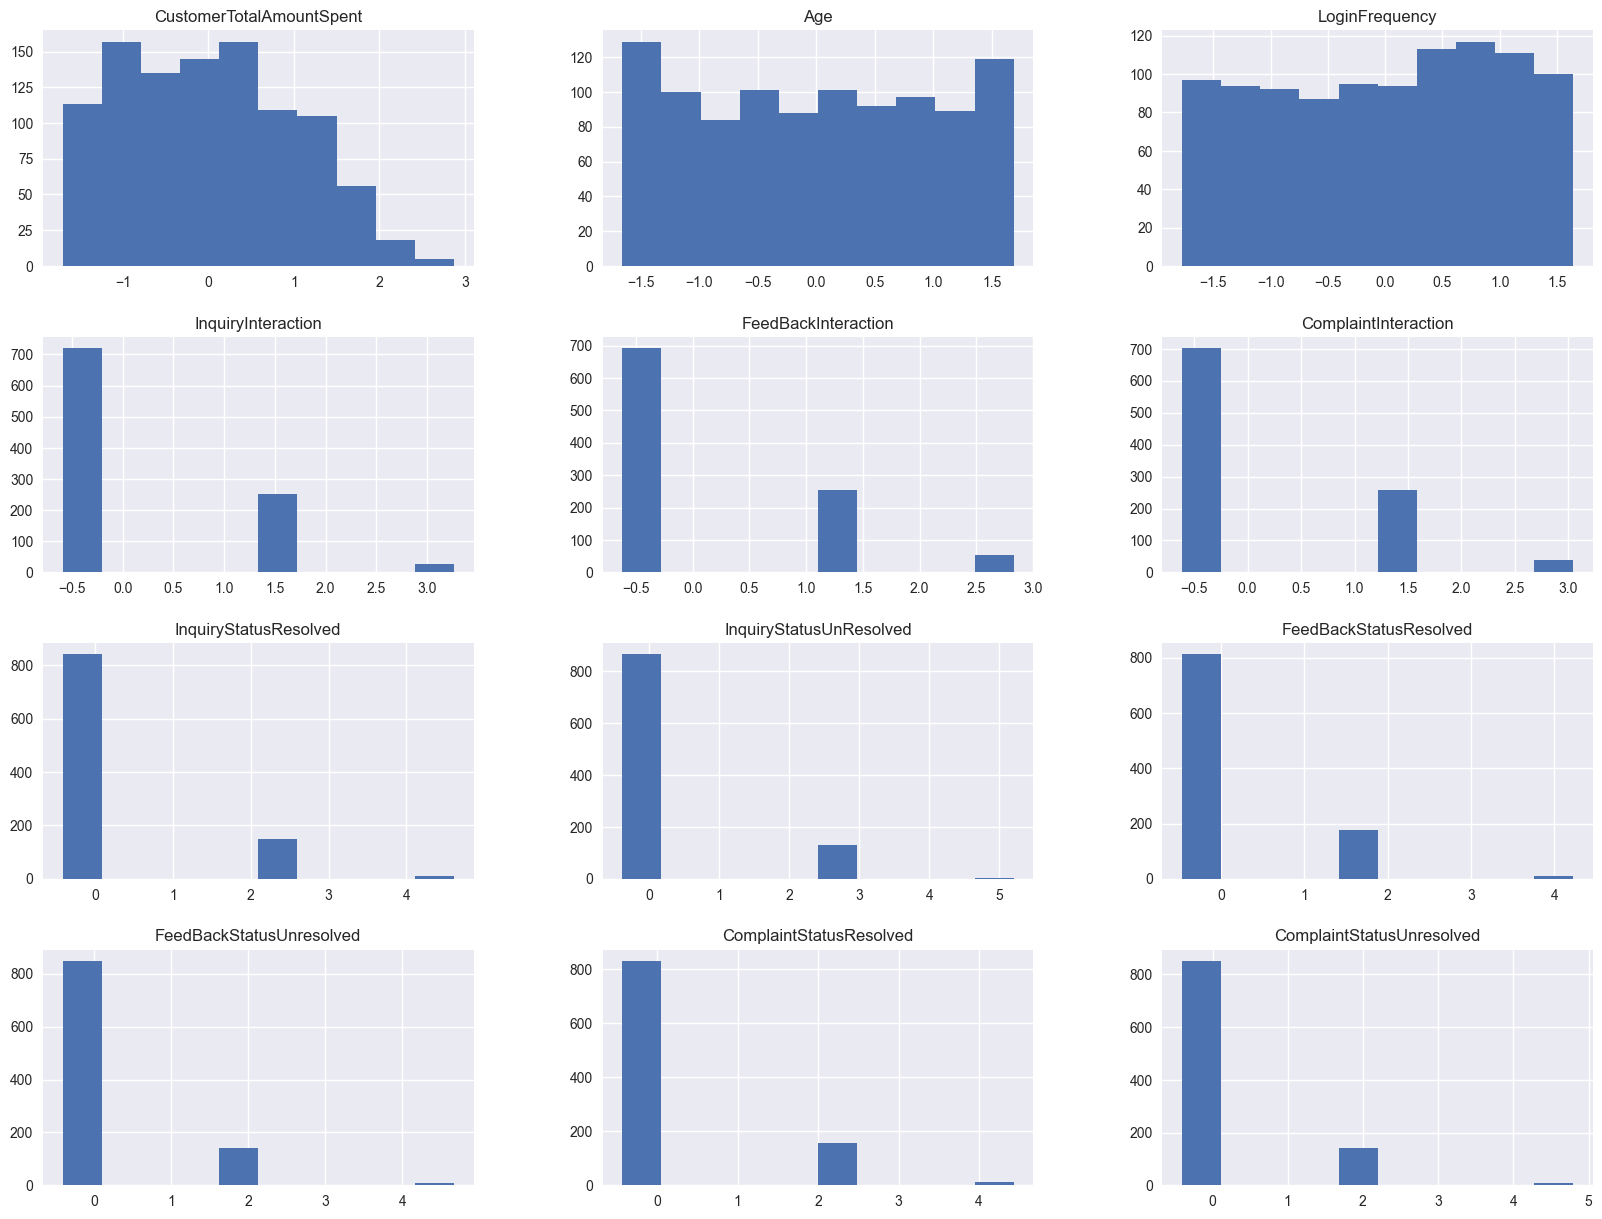

In [13]:
df2[Standardized_cols].hist(figsize=(20, 15))
plt.show()

In [14]:
df2.head()

,Age,GenderLabel,MaritalStatusLabel,IncomeLevelLabel,LoginFrequency,ServiceUsageLabel,CustomerTotalAmountSpent,InquiryInteraction,InquiryStatusResolved,InquiryStatusUnResolved,FeedBackInteraction,FeedBackStatusResolved,FeedBackStatusUnresolved,ComplaintInteraction,ComplaintStatusResolved,ComplaintStatusUnresolved,ChurnStatus
0,1.229628,1,1,1,0.575702,1,-1.152196,1.336775,2.094608,-0.389005,-0.62069,-0.467235,-0.408836,-0.612876,-0.435474,-0.405964,0
1,1.426547,1,2,1,-1.488513,2,0.379758,1.336775,2.094608,-0.389005,-0.62069,-0.467235,-0.408836,-0.612876,-0.435474,-0.405964,1
2,-1.658518,1,1,1,-1.630872,2,0.590481,1.336775,2.094608,-0.389005,-0.62069,-0.467235,-0.408836,-0.612876,-0.435474,-0.405964,0
3,-1.461599,1,3,1,-1.702052,2,-0.473822,3.265742,2.094608,2.409591,-0.62069,-0.467235,-0.408836,-0.612876,-0.435474,-0.405964,0
4,-1.461599,1,4,2,1.073961,2,0.994845,-0.592193,-0.422950,-0.389005,-0.62069,-0.467235,-0.408836,-0.612876,-0.435474,-0.405964,0


In [ ]:
#save the final encoded and standardized data into a new dataset

output_path ="/Users/musha/OneDrive/Documents/Forage Experience/Lloyd Assignment/Analysis/Final_Dataset.csv"
df2.to_csv(output_path, index=False)

Model Building

Solving the ChurnStatus class imbalance

In [15]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

In [29]:
df.ChurnStatus.value_counts()

ChurnStatus
0    796
1    204
Name: count, dtype: int64

C:\Users\musha\AppData\Local\Temp\ipykernel_125480\536986944.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df2, x='ChurnStatus', palette = ['Skyblue', 'lightcoral'])


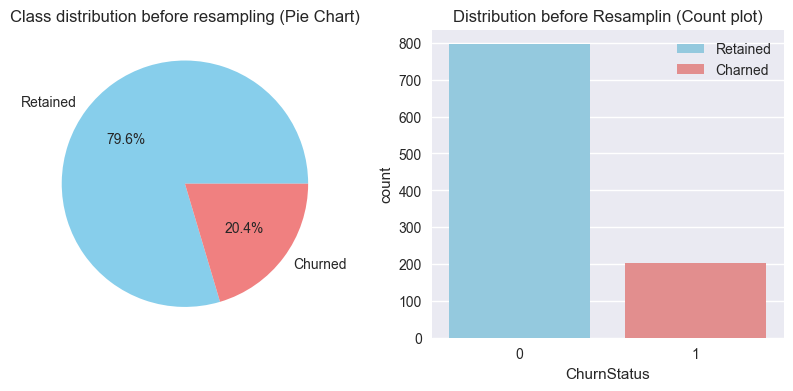

In [30]:
#plots for class ChurnStatus Distribution

fig, axes = plt.subplots(1,2, figsize=(10,4))

#pie chart
ChurnDist = df2['ChurnStatus'].value_counts()
axes[0].pie(ChurnDist, labels = ['Retained', 'Churned'], autopct = '%1.1f%%', colors = ['skyblue', 'lightcoral'])
axes[0].set_title('Class distribution before resampling (Pie Chart)')

# count plot
sns.countplot(data = df2, x='ChurnStatus', palette = ['Skyblue', 'lightcoral'])
axes[1].set_title('Distribution before Resamplin (Count plot)')
axes[1].legend(['Retained', 'Charned'])

In [31]:
#split the data into feature (X) and Target (y)

X = df2.drop('ChurnStatus', axis=1)
Y = df2['ChurnStatus']



In [32]:
#split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

In [33]:
#Function to plot the clas distribution after resampling

def plot_resampling_results(y_resampled, title):
    plt.figure(figsize=(4,4))
    pd.Series(y_resampled).value_counts().plot.pie(autopct='%1.1f%%', colors =['skyblue', 'lightcoral'])
    plt.title(title)
    plt.show()

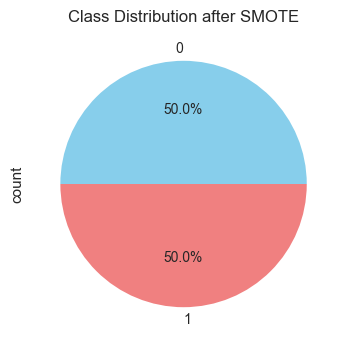

In [34]:
#SMOTE (Synthetic Minority Over-sampling Technique)

smote = SMOTE(random_state = 123)
X_smote, y_smote = smote.fit_resample(X_train, Y_train)
plot_resampling_results(y_smote, 'Class Distribution after SMOTE')

In [35]:
#Comparison before and after SMOTE Resampling
print('Before: ', Y_train.value_counts(), '\n After:', y_smote.value_counts())

Before:  ChurnStatus
0    636
1    164
Name: count, dtype: int64 
 After: ChurnStatus
0    636
1    636
Name: count, dtype: int64


In [36]:
print('No. Of records added: ', y_smote.shape[0] - Y_train.shape[0])

No. Of records added:  472


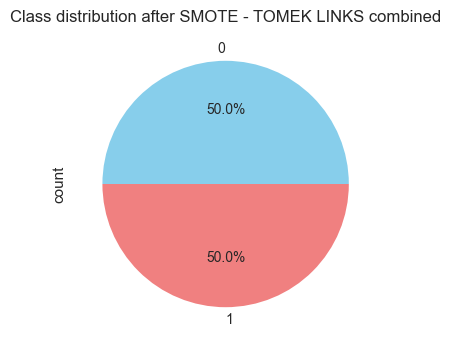

In [37]:
#SMOTE (Synthetic Minority Over-sampling Technique) and Tomek Links

smote_tomek = SMOTETomek(random_state = 42)
X_smoteTomek, y_smoteTomek = smote_tomek.fit_resample(X_train, Y_train)
plot_resampling_results(y_smoteTomek, 'Class distribution after SMOTE - TOMEK LINKS combined')

In [38]:
#Comparison of the class distribution before and after Smote-Tomek resampling

print('Before: ', Y_train.value_counts(), '\n After: ', y_smoteTomek.value_counts())

Before:  ChurnStatus
0    636
1    164
Name: count, dtype: int64 
 After:  ChurnStatus
0    622
1    622
Name: count, dtype: int64


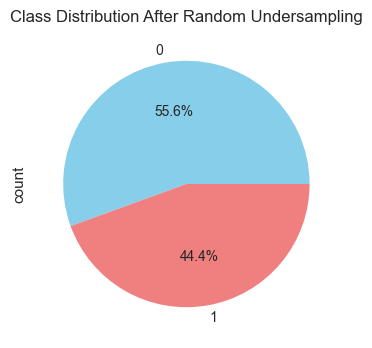

In [62]:
#Random Undersampling technique

Rus = RandomUnderSampler(random_state=101, sampling_strategy=0.8)
X_Rus, Y_Rus = Rus.fit_resample(X_train, Y_train)
plot_resampling_results(Y_Rus, 'Class Distribution After Random Undersampling')

In [63]:
print("Before", Y_train.value_counts(), "After: ",Y_Rus.value_counts())

Before ChurnStatus
0    636
1    164
Name: count, dtype: int64 After:  ChurnStatus
0    205
1    164
Name: count, dtype: int64


In [64]:
#Logistic regretion on the Under sampled data

from sklearn.linear_model import LogisticRegression

model0 = LogisticRegression()
model0.fit(X_Rus,Y_Rus)

Y_pred = model0.predict(X_test)

In [66]:
model0.score(X_test, Y_test)

0.6

[[108  52]
 [ 28  12]]


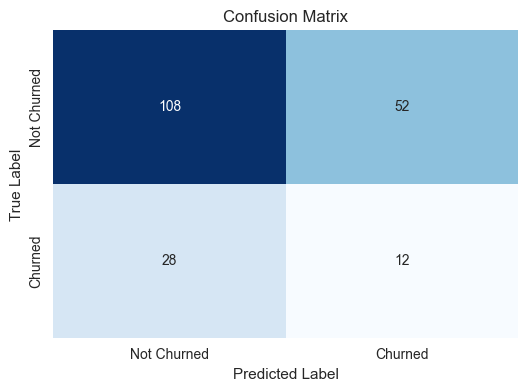

Model report 
               precision    recall  f1-score   support

           0       0.79      0.68      0.73       160
           1       0.19      0.30      0.23        40

    accuracy                           0.60       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.67      0.60      0.63       200



In [67]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, Y_pred))
# confusion matrix plot
cm= confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('Model report \n', classification_report(Y_test, Y_pred))

Model Fitting

In [ ]:
#Logistic Regression 

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_smote, y_smote)

y_pred = model.predict(X_test)

In [234]:
model.score(X_test, Y_test)

0.58

[[98 62]
 [22 18]]


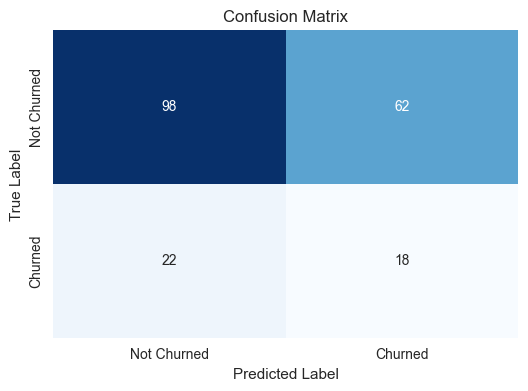

Model report 
               precision    recall  f1-score   support

           0       0.82      0.61      0.70       160
           1       0.23      0.45      0.30        40

    accuracy                           0.58       200
   macro avg       0.52      0.53      0.50       200
weighted avg       0.70      0.58      0.62       200



In [235]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, y_pred))
# confusion matrix plot
cm= confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('Model report \n', classification_report(Y_test, y_pred))

In [132]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

In [228]:
rf_model = RandomForestClassifier()
rf_model.fit(X_smote, y_smote)

y_rf_pred = rf_model.predict(X_test)

In [229]:
rf_model.score(X_test, Y_test)


0.715

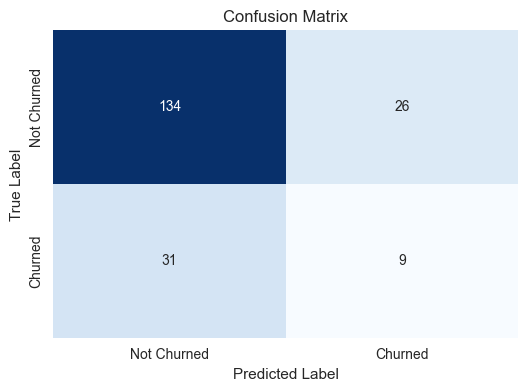

Classification Report               precision    recall  f1-score   support

           0       0.81      0.84      0.82       160
           1       0.26      0.23      0.24        40

    accuracy                           0.71       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.70      0.71      0.71       200



In [231]:
#print('Confusion Matrix \n', confusion_matrix(Y_test, y_rf_pred), '\n')
# confusion matrix plot
cm= confusion_matrix(Y_test, y_rf_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('Classification Report', classification_report(Y_test, y_rf_pred ))

In [232]:
#show feature importance

Feature_importance = pd.DataFrame(rf_model.feature_importances_, index=X.columns)
Feature_importance.head(19)

,0
Age,0.177216
GenderLabel,0.034460
MaritalStatusLabel,0.084268
IncomeLevelLabel,0.059992
LoginFrequency,0.166512
ServiceUsageLabel,0.053935
CustomerTotalAmountSpent,0.198264
InquiryInteraction,0.030730
InquiryStatusResolved,0.018341
InquiryStatusUnResolved,0.017734


In [217]:
#Hyper parameters tuning

rf_model2 = RandomForestClassifier(n_estimators = 200,
                                    criterion ='entropy',
                                    max_depth= None,
                                    random_state= 42,
                                    class_weight= 'balanced')

In [225]:
rf_model2.fit(X_smote, y_smote)

,n_estimators,200
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [226]:
rf_model2.score(X_test, Y_test)

0.705

In [227]:
y_rf_pred2 = rf_model2.predict(X_test)

print('\n COnfusion Matrix \n', confusion_matrix(Y_test, y_rf_pred2))

print('\n Classification Report \n', classification_report(Y_test, y_rf_pred2))


 COnfusion Matrix 
 [[133  27]
 [ 32   8]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       160
           1       0.23      0.20      0.21        40

    accuracy                           0.70       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.69      0.70      0.70       200

